# Изучение закономерностей, определяющих успешность игр

<p>Работа выполнена для интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.</p>

<b>План работы:</b>
* Предобработка данных
* Исследовательский анализ общих данных
* Определение актуальных для прогноза данных, и исследовательский актуальных данных.
* Составление портрета пользователя каждого региона
* Проверка гипотез
* Вывод

### Предобработка данных.

#### Ознакомление с данными.

Импортируем нужные библиотеки.

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import datetime as dt

Проведём общий обзор данных.

In [2]:
data = pd.read_csv('/datasets/games.csv')
display(data)
data.info()
data.describe()
data.isna().sum()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

В общем мы имеет 11 столбцов и 16715 строк. В некоторых столбцах есть пропуски, наибольшее количество пропусков в столбцах Critic_Score, User_Score и Rating. Также стоит привести столбцы к нижнему регистру.

In [3]:
data.columns = data.columns.str.lower()

Далее обработаем каждый столбец по очереди.

#### Столбец name

В столбце name всего 2 пропуска, скорее просто ошибка в данных, можно от них избавиться.

In [4]:
data.dropna(subset = ['name'], inplace = True) 
data['name'].isna().sum()

0

Проверим на явные дубликаты.

In [5]:
data['name'].duplicated().sum()

5154

Переведём все названия в нижний регистр.

In [6]:
data['name'] = data['name'].str.lower()
data['name'].duplicated().sum()

5154

Дубликатов не убавилось, однако скорее всего причина дубликатов — одинаковые названия игр для разных платформ, в таком случае можно оставить дубликаты.

#### Столбец platform

Здесь пропусков нет, но нужно проверить на дубликаты.

In [7]:
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Отлично, так как платформ немного, можно без лишнего кода определить, что ошибок в названиях нет. Но для убоства можно перевести строку в нижний регистр.

In [8]:
data['platform'] = data['platform'].str.lower()
data['platform'].unique()

array(['wii', 'nes', 'gb', 'ds', 'x360', 'ps3', 'ps2', 'snes', 'gba',
       'ps4', '3ds', 'n64', 'ps', 'xb', 'pc', '2600', 'psp', 'xone',
       'wiiu', 'gc', 'gen', 'dc', 'psv', 'sat', 'scd', 'ws', 'ng', 'tg16',
       '3do', 'gg', 'pcfx'], dtype=object)

#### Столбец year_of_release.

Далее столбец year_of_release, в нём 269 пропусков, думаю некоторые из них можно будет заполнить.

In [9]:
display(data.query('year_of_release.isna()'))
data.query('name == "fifa soccer 2004"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,madden nfl 2004,ps2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,fifa soccer 2004,ps2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,lego batman: the videogame,wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe smackdown vs. raw 2006,ps2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,space invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,pdc world championship darts 2008,psp,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,freaky flyers,gc,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,inversion,pc,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,hakuouki: shinsengumi kitan,ps3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
377,fifa soccer 2004,ps2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
2606,fifa soccer 2004,xb,2003.0,Sports,0.24,0.49,0.00,0.05,82.0,8.2,E
12029,fifa soccer 2004,gc,2003.0,Sports,0.05,0.01,0.00,0.00,83.0,6.2,E
13086,fifa soccer 2004,gba,2003.0,Sports,0.04,0.01,0.00,0.00,82.0,7.9,E


Как мы можем наблюдать, часть пропусков в дате релиза, можно заполнить датой релиза той же игры на другой платформе.

In [10]:
pd.options.mode.chained_assignment = None
for year in data[data['year_of_release'].isnull() == True].index:  
    data['year_of_release'][year] = data.loc[data['name'] == data['name'][year], 'year_of_release'].max()
display(data.query('name == "fifa soccer 2004"'))
data['year_of_release'].isna().sum()    

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
377,fifa soccer 2004,ps2,2003.0,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
2606,fifa soccer 2004,xb,2003.0,Sports,0.24,0.49,0.00,0.05,82.0,8.2,E
12029,fifa soccer 2004,gc,2003.0,Sports,0.05,0.01,0.00,0.00,83.0,6.2,E
13086,fifa soccer 2004,gba,2003.0,Sports,0.04,0.01,0.00,0.00,82.0,7.9,E


146

Отлично, нам удалось заполнить почти половину пропусков, от остальных избавимся.

In [11]:
data = data.dropna(subset = ['year_of_release'])
data['year_of_release'].isna().sum()

0

In [12]:
data['year_of_release'] = data['year_of_release'].astype('int')
#Также, разобравшись с пропусками, можно привести столбец к целочисленному типу данных

#### Столбец genre

In [13]:
data['genre'].isna().sum()

0

Похоже, что вместе с удалёнными данными с пропущенными именами, также пропали и пропуски в столбце genre.

In [14]:
data['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

Ошибок в названии тоже не замечено, переведём строки в нижний регистр для удобства

In [15]:
data['genre'] = data['genre'].str.lower()
data['genre'].unique()

array(['sports', 'platform', 'racing', 'role-playing', 'puzzle', 'misc',
       'shooter', 'simulation', 'action', 'fighting', 'adventure',
       'strategy'], dtype=object)

#### Столбцы critic_score, user_score, rating.

Вероятнее всего эти игры просто не были оценены. Однако помимо самих пропусков, также пропусками можно считать игры со значениями tbd в user_score.tbd =  To be determined, это можно перевести как "подлежит определению", однако в наших данных оценка так и не определена, следовательно обрабатывать такие значения надо также, как и пропуски.

In [16]:
display(data.query('critic_score.isna()'))
data.query('user_score =="tbd" ')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,tetris,gb,1989,puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,duck hunt,nes,1984,shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,nintendogs,ds,2005,simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,lma manager 2007,x360,2006,sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,spirits & spells,gba,2003,platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,zumba fitness,wii,2010,sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,namco museum: 50th anniversary,ps2,2005,misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,zumba fitness 2,wii,2011,sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,udraw studio,wii,2010,misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,just dance kids,wii,2010,misc,1.52,0.54,0.0,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,planet monsters,gba,2001,action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,bust-a-move 3000,gc,2003,puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,mega brain boost,ds,2008,puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,plushees,ds,2008,simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


Пропуски здесь не получится заменить средним или медианным значением, поэтому можно оставить их, значения TBD также заменим на пропуски. в rating заменим пропуски на "not_rated"

In [17]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = float('nan')
data.loc[data['rating'].isnull(), 'rating'] = 'not_rated'
data['user_score'] = data['user_score'].astype('float') # переведём в более подходящий тип данных.

In [18]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8492
user_score         9027
rating                0
dtype: int64

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16567 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16567 non-null  object 
 2   year_of_release  16567 non-null  int64  
 3   genre            16567 non-null  object 
 4   na_sales         16567 non-null  float64
 5   eu_sales         16567 non-null  float64
 6   jp_sales         16567 non-null  float64
 7   other_sales      16567 non-null  float64
 8   critic_score     8075 non-null   float64
 9   user_score       7540 non-null   float64
 10  rating           16567 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Отлично, пропуски, где возможно, устранили, столбцы перевели в нужные типы данных, осталось проверить столбец rating на ненужные дубликаты.

In [20]:
data['rating'].unique()

array(['E', 'not_rated', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

Ошибок нет.

#### Посчитаем суммарные продажи во всех регионах и запишим их в отдельный столбец.

In [21]:
data['global_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,global_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,not_rated,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,not_rated,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,NaN,NaN,not_rated,0.01
16711,lma manager 2007,x360,2006,sports,0.00,0.01,0.00,0.00,NaN,NaN,not_rated,0.01
16712,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,not_rated,0.01
16713,spirits & spells,gba,2003,platform,0.01,0.00,0.00,0.00,NaN,NaN,not_rated,0.01


Отлично, на этом предобработку можно считать завершённой.

#### Вывод

В ходе предобработки данных была проделана следующая работа:
* Были удалены пропуски в столбцах name и genre. Вероятная причина пропусков — ошибка в данных. Пропущенные значения двух столбцов совпали
* Переведены в нижний регистр для более удобной работы столбцы: name, genre, plaform.
* В столбце user_score были обработы значения tbd, которые по своей сути являлись пропусками. Вероятная причина пропусков — игры просто не были оценены.
* Изменен тип данных на более подходящий в столбцах year_of_release, user_score.
* Избавились от пропусков в столбце rating. Вероятная причина пропусков — игры не были оценены
* Поиск дубликатов — дубликаты не обнаружены.
* Добавлен столбец с суммарными продажами
<p>В общем можно сказать, что ошибок в данных достаточно мало, большинство пропусков связано с тем, что игры просто не были оценены.</p>

### Исследовательский анализ данных

#### Сколько игр выпускалось за разные годы?

Text(0.5, 0, 'Год')

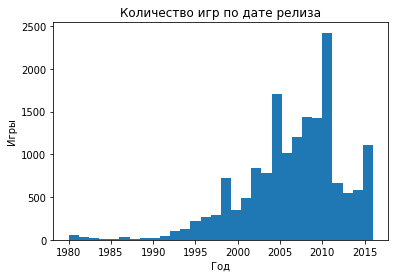

In [22]:
plt.hist(data['year_of_release'], bins=30)
plt.title('Количество игр по дате релиза')
plt.ylabel('Игры')
plt.xlabel('Год')

На графике мы можем наблюдать, что количество выпускаемых игр начало расти ближе к 2001 году и достигло пика в 2008, после количество игр начало немного снижаться, думаю дело в том, что качество и дороговизна создания игр выросли, поэтому количество игр упало. Думаю график стоит ограничить значениями с 2000 года, именно тогда начался рост, а также игровая индустрия начала обретать вид, похожий на современный.

Text(0, 0.5, 'Количество выпущенных игр')

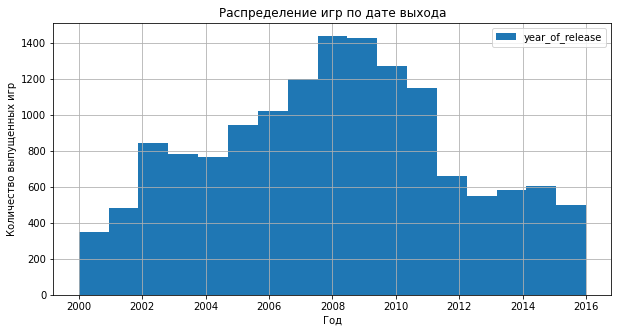

In [23]:
data.plot(kind='hist',y='year_of_release',grid=True, bins=17, figsize=(10,5), title='Распределение игр по дате выхода', range=(2000, 2016))
plt.xlabel('Год')
plt.ylabel('Количество выпущенных игр')

При более детальном рассмотрении, спад стал более заметен, действительно количество выпускаемых игр с каждым годом падает, после пика в 2008.

#### Как мелянись продажи по платформам?

In [24]:
platforms = data.groupby('platform')['global_sales'].sum().sort_values(ascending=False)
platforms.head(10)

platform
ps2     1247.16
x360     966.61
ps3      935.19
wii      903.31
ds       804.28
ps       727.58
ps4      314.14
gba      313.73
psp      293.57
pc       258.86
Name: global_sales, dtype: float64

<AxesSubplot:xlabel='platform'>

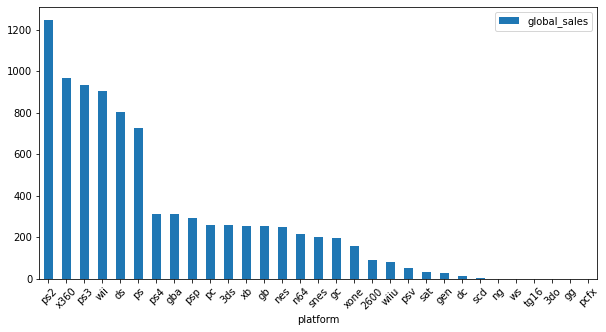

In [25]:
platforms.plot(kind='bar',rot=45,figsize=(10, 5),legend=True)

Возьмём десятку самых популярных платформ.

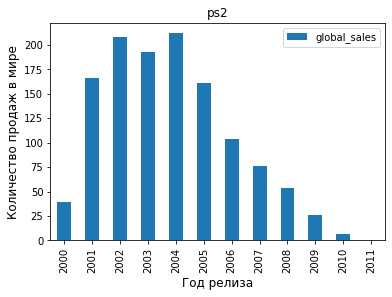

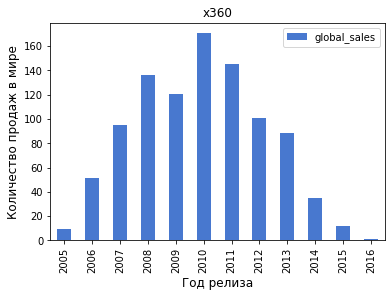

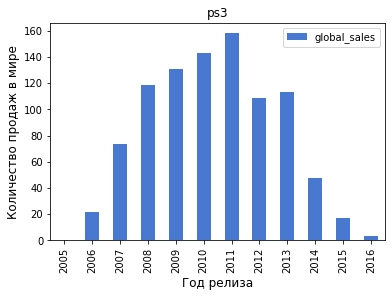

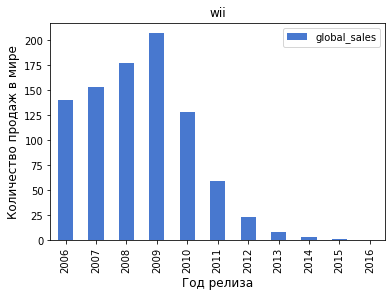

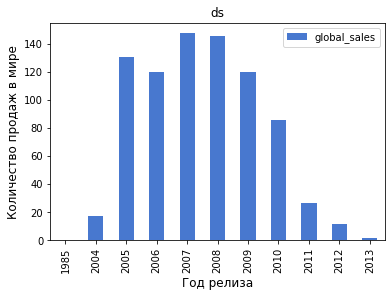

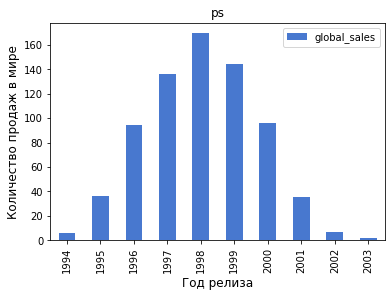

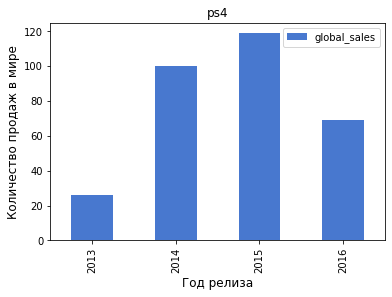

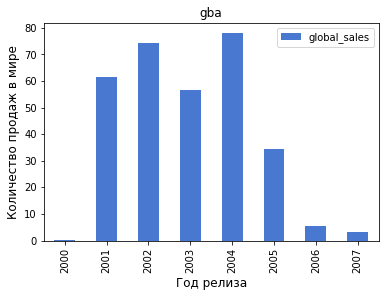

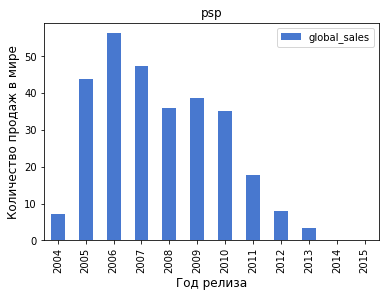

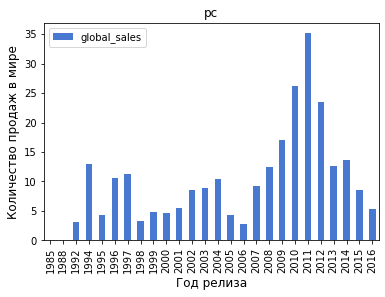

In [26]:
top_platforms = data.groupby('platform').agg({'global_sales':'sum'}).sort_values(by='global_sales', ascending=False).head(10).index
for platform in top_platforms:
    data[data['platform'] == platform].pivot_table(index='year_of_release', values='global_sales', aggfunc='sum').plot(
        kind='bar',)
    plt.title(platform)
    plt.style.use('seaborn-muted')
    plt.xlabel('Год релиза', fontsize = 12)
    plt.ylabel('Количество продаж в мире', fontsize = 12)
    
    plt.show()

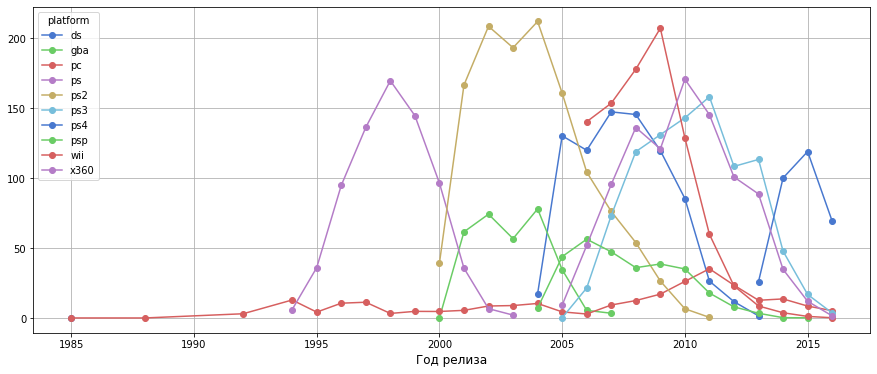

In [27]:
data.query('platform in @top_platforms').pivot_table(index='year_of_release', columns = 'platform', 
                                                   values='global_sales', aggfunc='sum').plot(grid = True,style = 'o-', figsize=(15,6))
plt.xlabel('Год релиза', fontsize = 12);

Как мы можем видить на графиках, в среднем одна платформа остаётся актуальной около 10 лет. Единственное серьёзное исключение — PC, но здесь дело в том, что PC можно постоянно модифицировать, обновляя запчасти. При этом всё ПК отстаёт по продажам от других платформ, здесь может быть две причины: 1)Персональный компьютер, предназначенный для игр стоит дороже, чем игровая приставка и чаще нуждается в обновлении. 2)Высокий уровень пиратства, на ПК, в отличие от других платформ, достаточно просто получать игры, не покупая их, следовательно, достаточно большая часть игроков на ПК просто не представлена в данных, так как не приобрели игру.

#### Просмотрим данные за актуальный период.

Просмотрим данные за актуальный период. Эти данные помогут нам составить прогноз на 2017 год. Думаю наиболее актуально будет взять данные с момента выхода нового поколения игровых платформ, а именно 2013 год. К тому же количество выпущенных игр за каждый год, начиная с 2013 не сильно менялось, после падения с пика в 2008.

In [28]:
actual_data = data.query('year_of_release >= 2013')
actual_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,global_sales
16,grand theft auto v,ps3,2013,action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,grand theft auto v,x360,2013,action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,NaN,NaN,not_rated,14.63
33,pokemon x/pokemon y,3ds,2013,role-playing,5.28,4.19,4.35,0.78,NaN,NaN,not_rated,14.60
42,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,strawberry nauts,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,not_rated,0.01
16707,aiyoku no eustia,psv,2014,misc,0.00,0.00,0.01,0.00,NaN,NaN,not_rated,0.01
16710,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,NaN,NaN,not_rated,0.01
16712,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,not_rated,0.01


Посмотрим какие платформы лидируют по продажам, растут или падают. Построим график по актуальным данным.

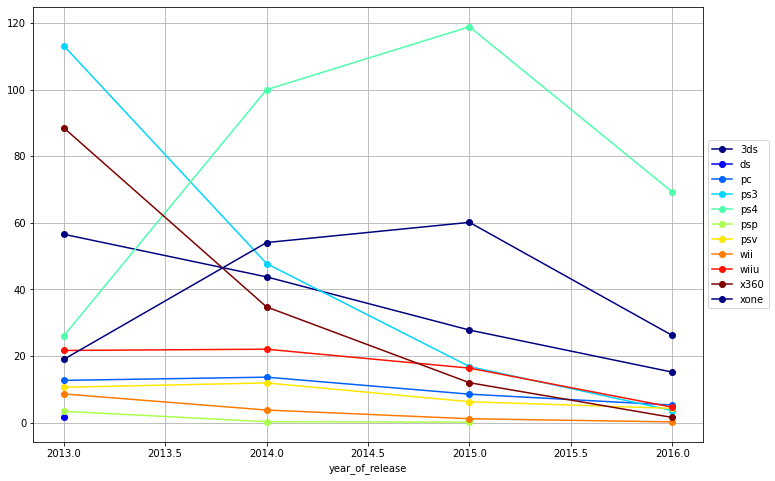

In [29]:
colors = plt.cm.jet(np.linspace(0, 1, 10))
actual_data.pivot_table(index='year_of_release', columns = 'platform', 
                                                   values='global_sales', aggfunc='sum').plot(grid = True, style = 'o-', figsize=(15,8), color=colors)
ax = plt.subplot()
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


На графике мы можем наблюдать, что мы достаточно правильно определили актуальный период. Платформы старого поколения становятся всё менее актуальными к 2016 году, в свою очередь платформы нового поколения(xbox one и ps4) занимают первые две строчки. После них идёт портативная 3ds, вышедшая в 2011. Остальные платформы держутся в низу списка, не считая psp, которая совсем потеряла свою актуальность. Если говорить о потенциально наиболее прибольных платформах, то это PS4, XBOX ONE и 3DS.

#### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

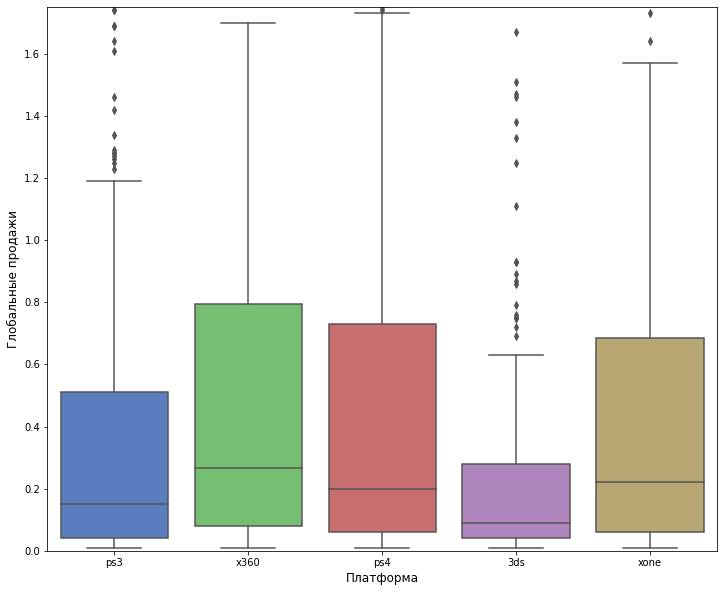

In [30]:
#Создадим переменную с топом актуальных платформ.
top_actual_platforms = actual_data.groupby('platform').agg({'global_sales':'sum'}).sort_values(by='global_sales', ascending=False).head(5).index
plt.figure(figsize=(12,10))
sns.boxplot(x = 'platform', y = 'global_sales', 
            data = actual_data[actual_data.platform.isin(top_actual_platforms)]);
plt.ylim(0,1.75)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Глобальные продажи',fontsize=12);

Из графика мы можем установить, что:
* Графики PS4 и XONE очень похожи, не смотря на то что ps4 имеет больше продаж.
* На рынке портативных консолей лидирует 3ds, обгоняя psv и psp, однако все три платформы имеют низкие значения.
* PS3 и XBOX360, всё ещё имеют хорошие показатели, не смотря на на выход нового поколения.

#### Построим график влияния на продажи на платформе PS4 отзывов пользователей и критиков.

Корреляция между продажами и оценкой пользователей: -0.031957110204556376


<Figure size 864x432 with 0 Axes>

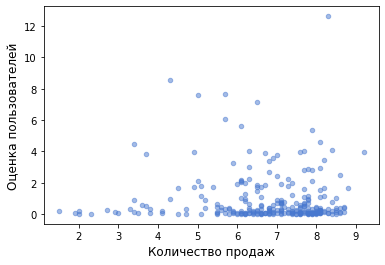

In [31]:
ps4_user_sales = data[(data['platform'] == 'ps4') & (data['user_score'] > 0)]
plt.figure(figsize=(12,6))
ps4_user_sales.plot(kind = 'scatter', x = 'user_score', y = 'global_sales', alpha = 0.5)
plt.xlabel('Количество продаж', fontsize=12)
plt.ylabel('Оценка пользователей',fontsize=12)
corr_user = ps4_user_sales['user_score'].corr(ps4_user_sales['global_sales'])
print(f'Корреляция между продажами и оценкой пользователей: {corr_user}');

Корреляция между продажами и оценкой критиков:0.40656790206178095


<Figure size 864x432 with 0 Axes>

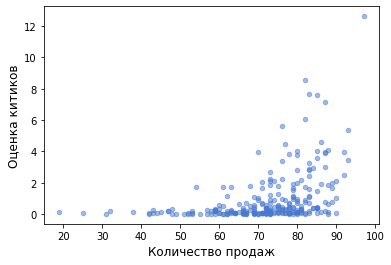

In [32]:
plt.figure(figsize=(12,6))
ps4_critic_sales = data[(data['platform'] == 'ps4') & (data['critic_score'] > 0)]
ps4_critic_sales.plot(kind = 'scatter', x = 'critic_score', y = 'global_sales', alpha = 0.5)
plt.xlabel('Количество продаж', fontsize=12)
plt.ylabel('Оценка китиков',fontsize=12)
corr_critic = ps4_critic_sales['critic_score'].corr(ps4_critic_sales['global_sales'])
print(f'Корреляция между продажами и оценкой критиков:{corr_critic}');

Мы можем наблюдать, что пользовательские оценки практически не оказывают влияния на количество продаж. В свою очередь оценки критиков имеют среднюю положительную корреляцию. Вероятно причина такой разницы в корреляции с оценками пользователей и критиков и том, что критики оценивают игру ещё до её выхода, а пользователи после, как правило основная часть продаж идёт в первые недели. Соотнесём данные по PS4 с другими платформами.

In [33]:
def platform_corr_matrix(name_of_platform):
    platform = data[data['platform']==name_of_platform]
    fig, ax = plt.subplots(1 ,2, figsize=(15,5))
    sns.scatterplot(x='user_score', y='global_sales', data=platform, ax=ax[0])
    sns.scatterplot(x='critic_score', y='global_sales', data=platform, ax=ax[1])
    fig.suptitle(name_of_platform, fontsize=15)
    ax[0].set(xlabel='Оценка пользователей')
    ax[1].set(xlabel='Оценка критиков')
    ax[0].set(ylabel='Количество продаж')
    ax[1].set(ylabel='Количество продаж')
    plt.show()
    
    correl = platform['user_score'].corr(platform['global_sales'])
    critic_correl = platform['critic_score'].corr(platform['global_sales'])
    print(f'Корреляция между продажами и оценкой пользователей:{correl}')
    print(f'Корреляция между продажами и оценкой критиков:{critic_correl}')

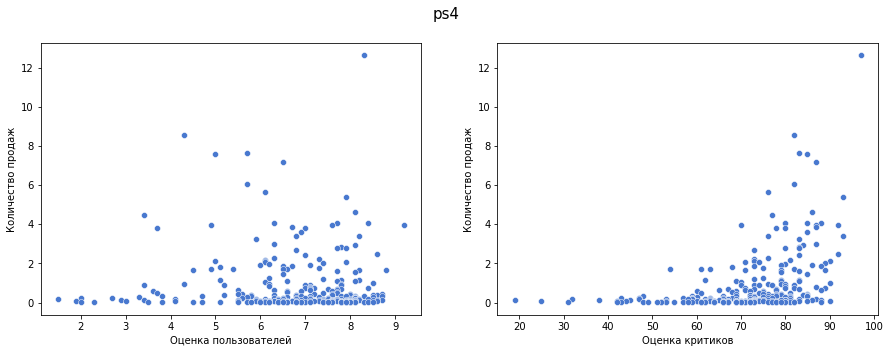

Корреляция между продажами и оценкой пользователей:-0.031957110204556376
Корреляция между продажами и оценкой критиков:0.40656790206178095


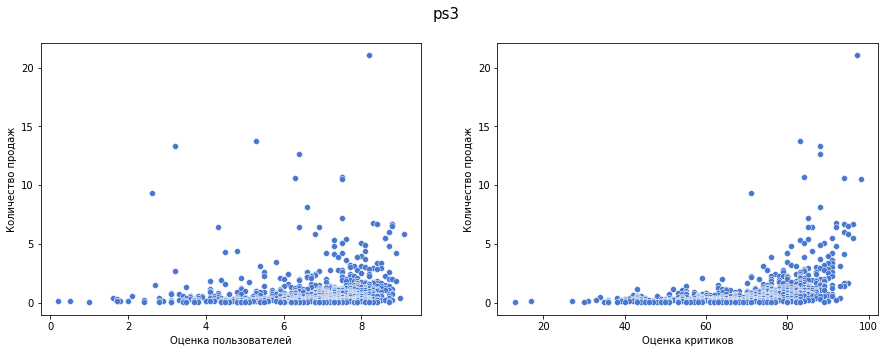

Корреляция между продажами и оценкой пользователей:0.12781061204589392
Корреляция между продажами и оценкой критиков:0.432275045992511


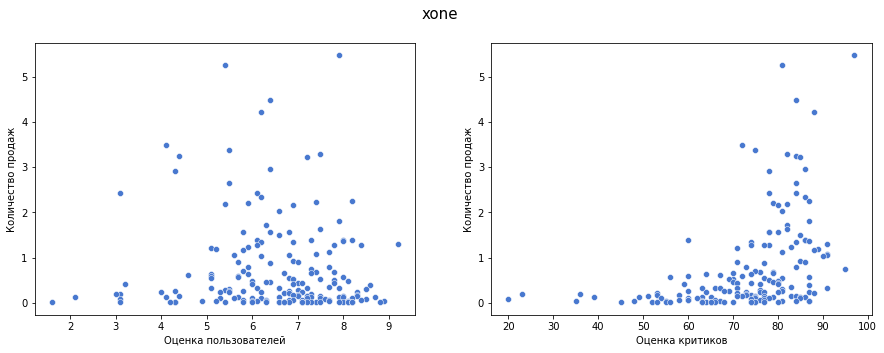

Корреляция между продажами и оценкой пользователей:-0.06892505328279414
Корреляция между продажами и оценкой критиков:0.4169983280084017


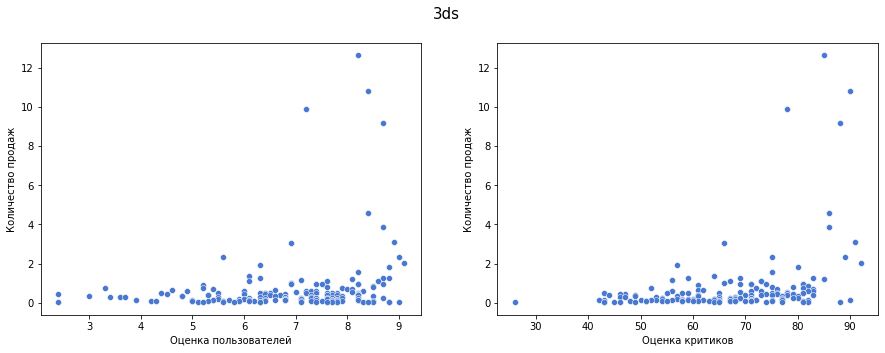

Корреляция между продажами и оценкой пользователей:0.222305117884012
Корреляция между продажами и оценкой критиков:0.34821555174929825


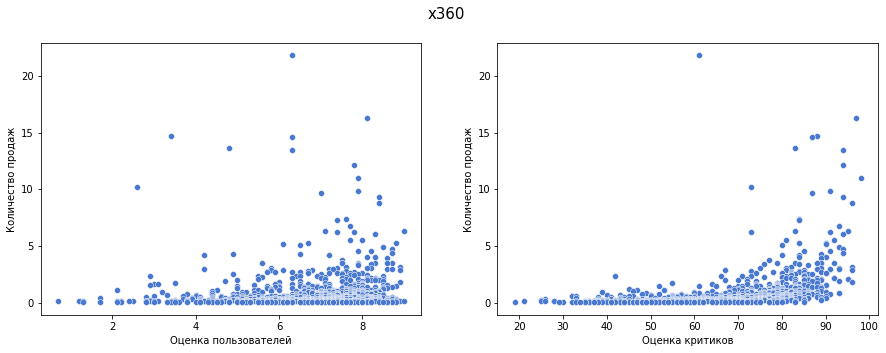

Корреляция между продажами и оценкой пользователей:0.11365027165034972
Корреляция между продажами и оценкой критиков:0.3917421352905376


In [34]:
for platform in top_actual_platforms:
    platform_corr_matrix(platform)

Вывод: 
Практически везде наблюдается такая же картина как и на ps4, за исключением 3ds и wiiu. На этих платформах оценка пользователей имеет свой вес, на wiiu она даже имеет большую корреляцию, чем оценка критиков. Однако везде корреляция ниже средней.

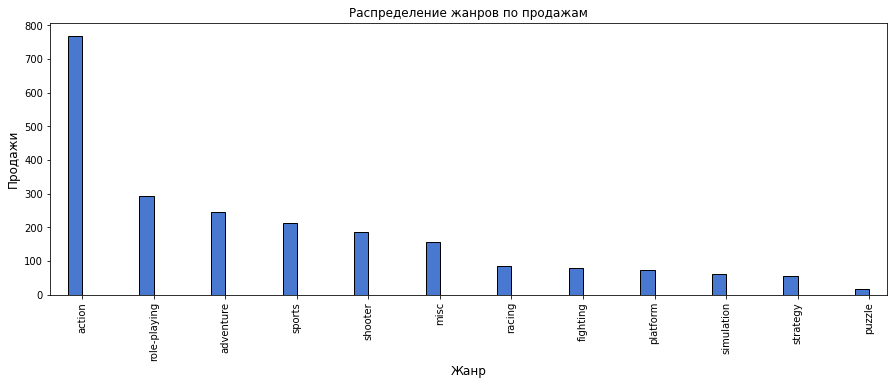

In [35]:
ax = plt.gca()
pivot = actual_data.groupby('genre').agg({'name': 'count', 'global_sales': 'sum'}).sort_values(by='name', ascending=False)
plot1 = pivot['name']
plot1.plot(kind='bar', figsize=(15,5), ec='black', ax=ax, width=0.2, position=1, title='Распределение жанров по продажам')
plt.xlabel('Жанр', fontsize=12);
plt.ylabel('Продажи', fontsize=12);

Здесь мы можем наблюдать, что самый популярный жанр — action. Он опережает все другие жанры в минимум 2.5 раза. За ним в первой пятёрке role-playing, adventure, sports и shooter. Самые непопулярные жанры strategy и puzzle.
В принципе распределение достаточно очевидное, action это смежный жанр, то есть action могут быть как и adventure, так и role-playing. Суть жанра в упоре на физические возможности игрока, последнее время именно такие игры популярны. Низкая популярной головоломок и стратегий вполне понятна, такого жанра игры не для всех, для большинства игроков игры впервую очередь развлечение.

Отсортируем жанры по продажам.

In [36]:
pivot_actual = actual_data.pivot_table(index='genre', 
                               values='global_sales',aggfunc=['mean','median'])
pivot_actual.columns = ['mean', 'median']
pivot_actual.sort_values(by='mean',ascending=False)

,mean,median
genre,,
shooter,1.245882,0.450
sports,0.703972,0.240
platform,0.576081,0.225
role-playing,0.499623,0.125
racing,0.469294,0.120
fighting,0.441375,0.125
action,0.419376,0.110
misc,0.404231,0.105
simulation,0.350968,0.100


Самые высокие средние продажи у жанра shooter, далее идут симуляторы спорта и платформеры, замыкают ролевые игры. Самые низкие средние продажи у головоломок, стратегий и "бродилок". Построим график динамики продаж по годам для большей наглядности.

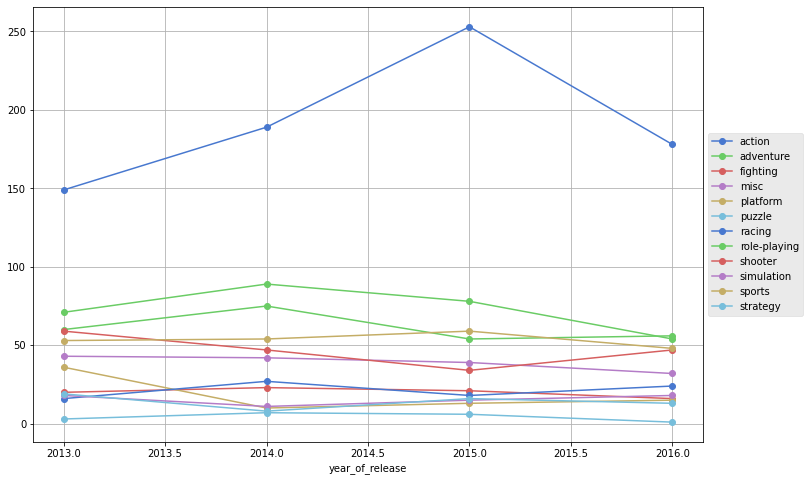

In [37]:
actual_data.pivot_table(index='year_of_release', columns = 'genre', values='global_sales', 
                               aggfunc='count').plot(grid = True, style = 'o-', figsize=(15,8))
actual_data.pivot_table(index='year_of_release', columns = 'genre', values='global_sales', 
                               aggfunc='count').sort_values(by='year_of_release', ascending=False)
plt.style.use('ggplot')
ax = plt.subplot()
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

Вывод:
* Самый популярный жанр, как и наибольший по продажам Action, это связано с тем, что это смежный жанр и зачастую игры жанра action имеют несколько жанров, поэтому статистика идёт по играм многих жанров.
* Самые высокие средние продажи у жанров shooter и sports. Вероятнее всего это связано с тем, что у этих игр наибольшая аудитория, которая каждый год покупает новые игры.
* Динамика продаж игр по годам достаточно равномерная, жанры особо не теряют и не набирают актуальности.
* Самые непопулярные и неприбыльные жанры: strategy и puzzle.
<p> Также стоит понимать, что высокие продажи могут быть вызваны не только успехом, но и большим количеством игр, например, как в случае с жанром Action. Поэтому, если выбирать критерий "успешности", то, думаю, стоит полагаться на медианные продажи, в таком случае самые успешные жанры shooter и sports. В свою очередь жанр action, который по чистым продажам опережает все другие жанры, по медианным продажам лишь во второй половине списка.</p>

### Составим портрет пользователя каждого региона

Самым удобным вариантом будет: написать функцию для построения графика, в зависимости от группируемых данных.

In [38]:
def actual_data_hist(groupby, region_sales, ax):
    pivot = actual_data.groupby(groupby).agg({region_sales: 'sum'}).sort_values(by=region_sales, ascending=False).head(5)
    title = {'na_sales': 'Продажи в Северной Америке', 'eu_sales': 'Продажи в Европе', 'jp_sales': 'Продажи в Японии'}
    color = {'na_sales': 'blue', 'eu_sales': 'red', 'jp_sales': 'green'}
    plot = pivot.plot(kind='bar', ec='black', title=title[region_sales], ax=axes[ax], 
                   fontsize=18, color=color[region_sales], rot=30)
    plot.set_ylabel('Млн. копий', fontsize = 15)
    plot.set_xlabel('')
    plot.title.set_size(20)

#### Самые популярные платформы по долям продаж.

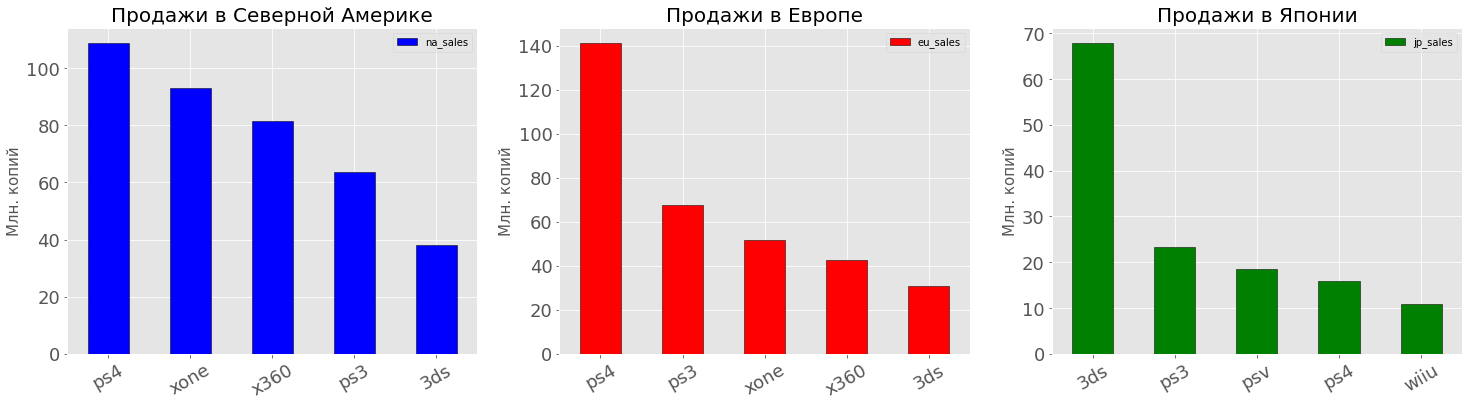

In [39]:
fig, axes = plt.subplots(1, 3, figsize=(25,6))
actual_data_hist('platform', 'na_sales', 0)
actual_data_hist('platform', 'eu_sales', 1)
actual_data_hist('platform', 'jp_sales', 2)

На графиках мы можем наблюдать следующее:
* В США самые популярные платформы PS4 и XBOX ONE.
* В Европе самые популярные платформы это PS4 и PS3.
* В Японии с большим отрывом 3ds отзодит другие платформы.
<p> Можно сделать вывод, что в США, в отличие от других регионов, практически равная конкуренция между XBOX ONE и PS4, с небольшим перевесом в сторону PS4. Вероятнее всего это связан с тем, что XBOX ONE это продукт американской компании Mircosoft, и поэтому они могут успешно конкурировать на домашнем рынке. Так же в США, относительно других регионов, всё ещё приличным спросом пользуются XBOX 360 и PS3
<p>В Европе абсолютным лидером является PS4, XBOX ONE уступает даже прошлому поколению в лице PS3.
<p>В Японии наибольшей популярностью пользуется, невостребованная в других регионах, 3DS, причём с большим отрывом. Также, что удивительно, PS3 опережает по продажам PS4. Первое, вероятно связано с тем, что японская компания Nintendo, выпускающая 3DS, также является крупной игровой студией, нацеленной, в первую очередь, на японский рынок, благодаря чему удаётся выигрывать конкуренцию в домашнем регионе. Второе, вероятно, связано с тем, что, не смотря на то, что Sony японская компания(пускай и с крупным офисом в США), релиз PS4 в японии состоялся на полгода позже, чем в других странах. XBOX ONE, занимающий уверенные позиции в других регионах, здесь не попал даже в топ 5, уступив устаревшей wiiu.

#### Cамые популярные жанры по долям продаж.

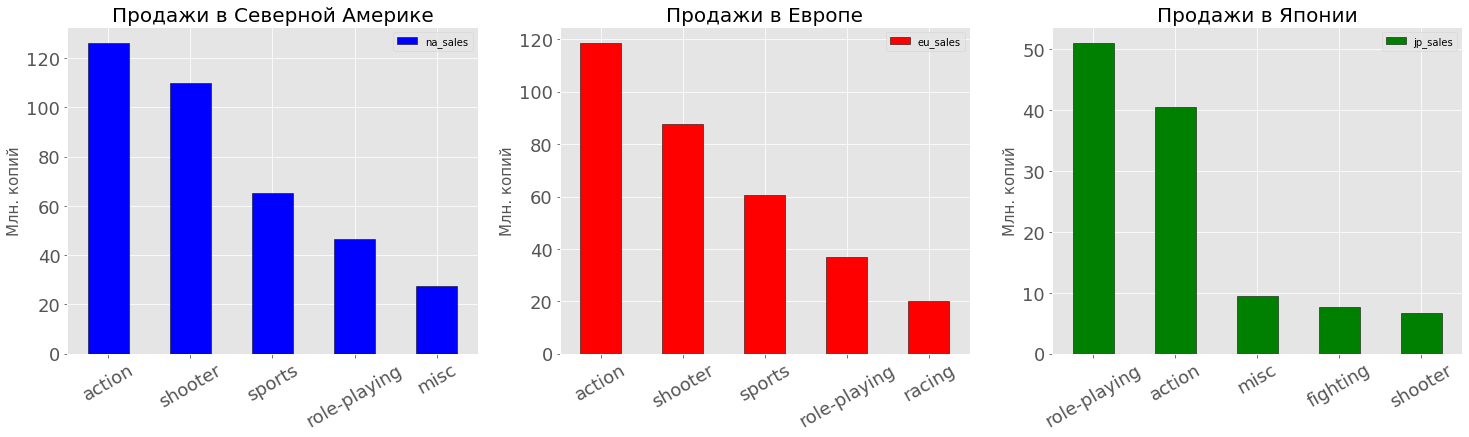

In [40]:
fig, axes = plt.subplots(1, 3, figsize=(25,6))
actual_data_hist('genre', 'na_sales', 0)
actual_data_hist('genre', 'eu_sales', 1)
actual_data_hist('genre', 'jp_sales', 2)

Исходя из графиков можно сделать вывод, что: 
* В Европе и США распределение по жанрам практически одинаковое.
* Самым популярным жанром в среднем, ожидаемо, оказался Action.
* В Японии огромную популярность имеет жанр role-playing.
<p> О феномене популярность жанра action было сказано достаточно много в моём исследовании ранее, поэтому можно акцентировать внимание на популярности role-playing в Японии. Дело в том, что в Японии есть отдельный популярный поджанр role-playing, который так и называется JRPG(Japanese Role Playing Game). Помимо этого, JRPG, является пошаговым жанром, исключающим себя смежный жанр action, в отличие от популярных, в последние годы на западе Action RPG.

#### Влияет ли рейтинг ESRB на продажи?

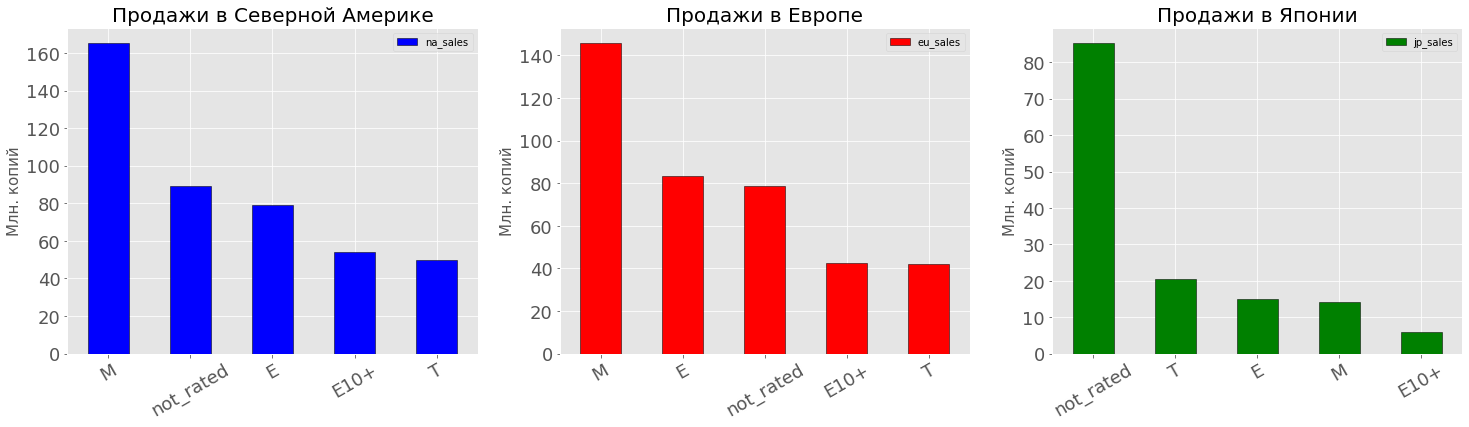

In [41]:
fig, axes = plt.subplots(1, 3, figsize=(25,6))
actual_data_hist('rating', 'na_sales', 0)
actual_data_hist('rating', 'eu_sales', 1)
actual_data_hist('rating', 'jp_sales', 2)

Исходя из данных можно сделать вывод:
* В США и Европе наибольшие продажи пользуются игры с оценкой M(не подходят для лиц младше 17 лет)
* Достаточно много игр не оценены
* В Японии большинство игр не оценены, между остальными оценками, продажи распределены более менее равномерно.
<p> Можно сделать вывод, что последнее время в Европе и США, наибольшей популярностью пользуются игры для взрослой аудитории. Причина большого количества неоценённых игр в Японии, вероятнее всего связана с тем, что оценка ESRB используется на рынке западных стран, в свою очередь в Японии большое количество игр направлено на домашний рынок.

### Проверка гипотез.

#### Определимся с критерием проверки гипотез.

Проверка нормальности распределения выборок данных для проверки первой гипотезы.

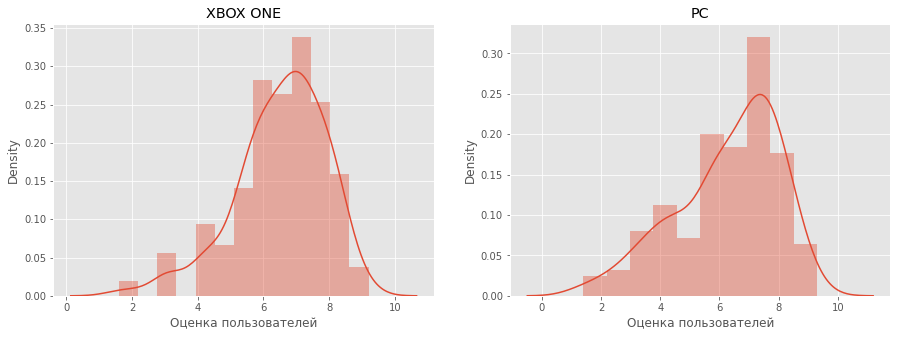

In [42]:
xbox_one = actual_data.query('platform == "xone" & user_score >= 0') # создадим переменную с данными о XBOX ONE
pc = actual_data.query('platform == "pc" & user_score >= 0')# создадим переменную с данными о PC

fig, ax = plt.subplots(1 ,2, figsize=(15,5))
sns.distplot(xbox_one['user_score'], ax=ax[0])
sns.distplot(pc['user_score'], ax=ax[1])
ax[0].set(xlabel='Оценка пользователей', title = 'XBOX ONE' )
ax[1].set(xlabel='Оценка пользователей', title = 'PC');

Для второй гипотезы.

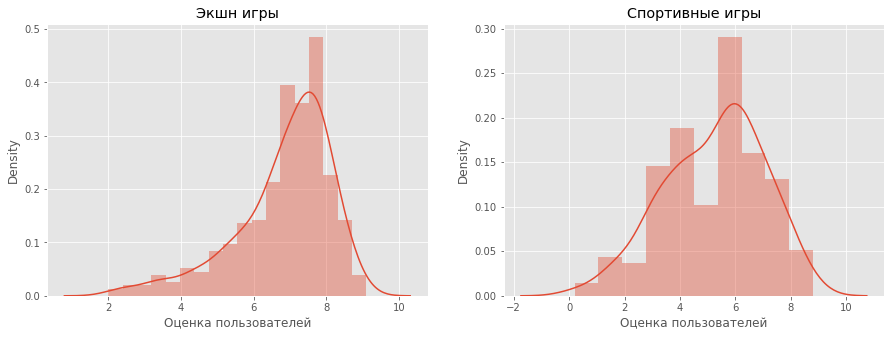

In [43]:
action_score = actual_data.query('genre == "action" & user_score >= 0') # создадим переменную с данными о жанре action
sports_score = actual_data.query('genre == "sports" & user_score >= 0')# создадим переменную с данными о жанре sports

fig, ax = plt.subplots(1 ,2, figsize=(15,5))
sns.distplot(action_score['user_score'], ax=ax[0])
sns.distplot(sports_score['user_score'], ax=ax[1])
ax[0].set(xlabel='Оценка пользователей', title = 'Экшн игры' )
ax[1].set(xlabel='Оценка пользователей', title = 'Спортивные игры');

Распределения в обоих случаях не являются нормальными, поэтому будем использовать критерий Манна-Уитни для обеих гипотез.

#### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Нулевая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC равны.</p>
Альтернативная гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC не равны.

In [44]:
alpha = 0.05 # уровень статистической значимости

results = st.mannwhitneyu(xbox_one['user_score'], pc['user_score'])

print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.5184754169156851
Не получилось отвергнуть нулевую гипотезу


Не получилось отвергнуть нулевую гипотезу, следовательно средние пользовательские рейтинги платформ, скорее всего, одинаковые.

#### Средние пользовательские рейтинги жанров Action  и Sports разные.

Нулевая гипотеза:  Средние пользовательские рейтинги жанра Action не равны Sports. </p>
Альтернативная гипотеза:     Средние пользовательские рейтинги жанра Action равны Sports.

In [45]:
alpha = 0.05 # уровень статистической значимости

results = st.mannwhitneyu(action_score['user_score'], sports_score['user_score'])

print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 1.4675271698449454e-23
Отвергаем нулевую гипотезу


Отвергаем нулевую гипотезу, похоже, что пользовательские рейтинги действительно разные

### Вывод

<p>
<b>По итогу анализа можно сделать следующие выводы:</b></p>

* Самые прибыльные платформы PS4, XBOX ONE и 3DS
* Оценки пользователей особо не оказывают влияния на продажи, в свою очередь оценки критиков оказывают среднее влияние
* Самый популярный жанр игр: Action.
* Наибольшие средние продажи у жанра Shooter
* В США наиболее популярная платформа PS4, но XBOX ONE не сильно отстаёт. Самый популярный жанр Action
* В Европе наиболее популярная платформа PS4. Самый популярный жанр Action
* В Японии самая популярная платформа 3ds. Самый популярный жанр role-playing.
<p>
<b>Рекомендации по планированию продаж и рекламных акций на 2017 год:</b>
(Я осмелюсь предположить, что магазин "Стримчик" существует на прострах России)
В первую очередь в следующем году стоит сделать упор на платформы нового поколения. По графикам видно, что PS3 и XBOX 360 стремительно теряют популярность, в свою очередь популярность новых не падает(она немного проседает из-за общей просадки продаж по годам). Рекомендую сделать упор на игры для PS4, так как это самая популярная платформа на европейском рынке, второй платформой по приоритетности должен быть XBOX ONE. Третьей, четвёртой и пятой и шестой по приоритетности должны быть PS3, XBOX 360, 3ds и PC. Последние четыре платформы, на мой взгляд, имеют примерно равный приоритет. По следующим причинам:</p>

* PS3 и XBOX 360 всё ещё пользуются спросом в европейском регионе</p>
* PC на графиках не входит в топ 5, но игры на PC не устаревают, что мы могли наблюдать на графике. PC имеет малое количество продаж, но зато они стабильны.
* 3ds находится внизу топ 5, но это уникальная платформа, на которой, к тому же нет возможноти реализации пиратских игр.
<b><p>Касательно приоритетных жанров игр для продаж, рекомендую обратить внимание на такие жанры как shooter, action, sports, role-playing. У каждого из этих жанров есть следующие преимущества:</p></b>

* Shooter имеет наибольшие средние продажи
* Action наиболее популярный жанр, не смотря на то, что он смежный. Стоит обратить внимание на любые жанры с приставкой action.
* Sports стабильно имеет хорошие продажи, у этого жанра свои фанаты, которые каждый год покупают новую игру.
* role-playing достаточно актуальный жанр, особенного внимания заслуживает жанр actionRPG 
<p><p>Также рекомендую не обращать особого внимания на пользовательские оценки, как показали данные, они практически не влияют на продажи. Что касается оценок критиков, считаться с ними стоит, но они не являются основополагающими в продажах.
Последняя рекомендация: думаю следует ориентироваться на взрослую аудиторию, так как наибольшие продажи у игр с рейтингом M(не подходят для лиц младше 17 лет)</p>